# Apple vs Samsung Stock Closing Price Comparison

In [1]:
pip install finance-datareader # library download for finance database in python

Note: you may need to restart the kernel to use updated packages.


In [7]:
import FinanceDataReader as fdr

In [18]:
samsung = fdr.DataReader('005930') # samsung stock ticker = 005930
samsung_first_date = str(samsung.index[0])
apple = fdr.DataReader('AAPL', samsung_first_date) # apple stock ticker = AAPL
samsung

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1999-05-27,1660,1724,1658,1660,803200,NaN
1999-05-28,1660,1680,1641,1650,539161,-0.006024
1999-05-31,1646,1680,1644,1658,435717,0.004848
1999-06-01,1640,1726,1625,1706,962093,0.028951
1999-06-02,1733,1860,1730,1806,1306585,0.058617
...,...,...,...,...,...,...
2023-08-31,67100,67200,66400,66900,15964630,-0.002981
2023-09-01,66800,71000,66700,71000,29738235,0.061286
2023-09-04,72900,72900,70700,71200,26286495,0.002817


In [19]:
apple

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-05-27,0.385603,0.390625,0.381138,0.388393,0.329667,336761600
1999-05-28,0.386719,0.395647,0.385045,0.393415,0.333929,201129600
1999-06-01,0.401786,0.404576,0.396205,0.400112,0.339614,461025600
1999-06-02,0.397321,0.428013,0.392857,0.415737,0.352876,521057600
1999-06-03,0.418527,0.428571,0.417969,0.423549,0.359507,488510400
...,...,...,...,...,...,...
2023-08-29,179.699997,184.899994,179.500000,184.119995,184.119995,53003900
2023-08-30,184.940002,187.850006,184.740005,187.649994,187.649994,60813900
2023-08-31,187.839996,189.119995,187.479996,187.869995,187.869995,60794500


In [14]:
# NaN Boolean = False - checking to see if there exists any false values 
# Missing data check 
samsung_isna = samsung.isna().sum()
apple_isna = apple.isna().sum()

In [16]:
samsung_isna

Open      0
High      0
Low       0
Close     0
Volume    0
Change    1
dtype: int64

In [17]:
apple_isna

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
samsung = samsung.fillna(0)  # 0 is true value, fills the 1 missing value with 0 thus making it true 
samsung

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1999-05-04,1790,1829,1761,1761,554765,0.000000
1999-05-06,1780,1878,1774,1816,1127199,0.031232
1999-05-07,1854,1927,1845,1867,964737,0.028084
1999-05-10,1870,1927,1845,1920,504842,0.028388
1999-05-11,1917,1917,1827,1830,647789,-0.046875
...,...,...,...,...,...,...
2023-08-08,69000,69100,67400,67600,14664709,-0.013139
2023-08-09,68000,69600,67900,68900,17259673,0.019231
2023-08-10,68300,68500,67800,68000,10227311,-0.013062


## Stock Data Visualization

In [21]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

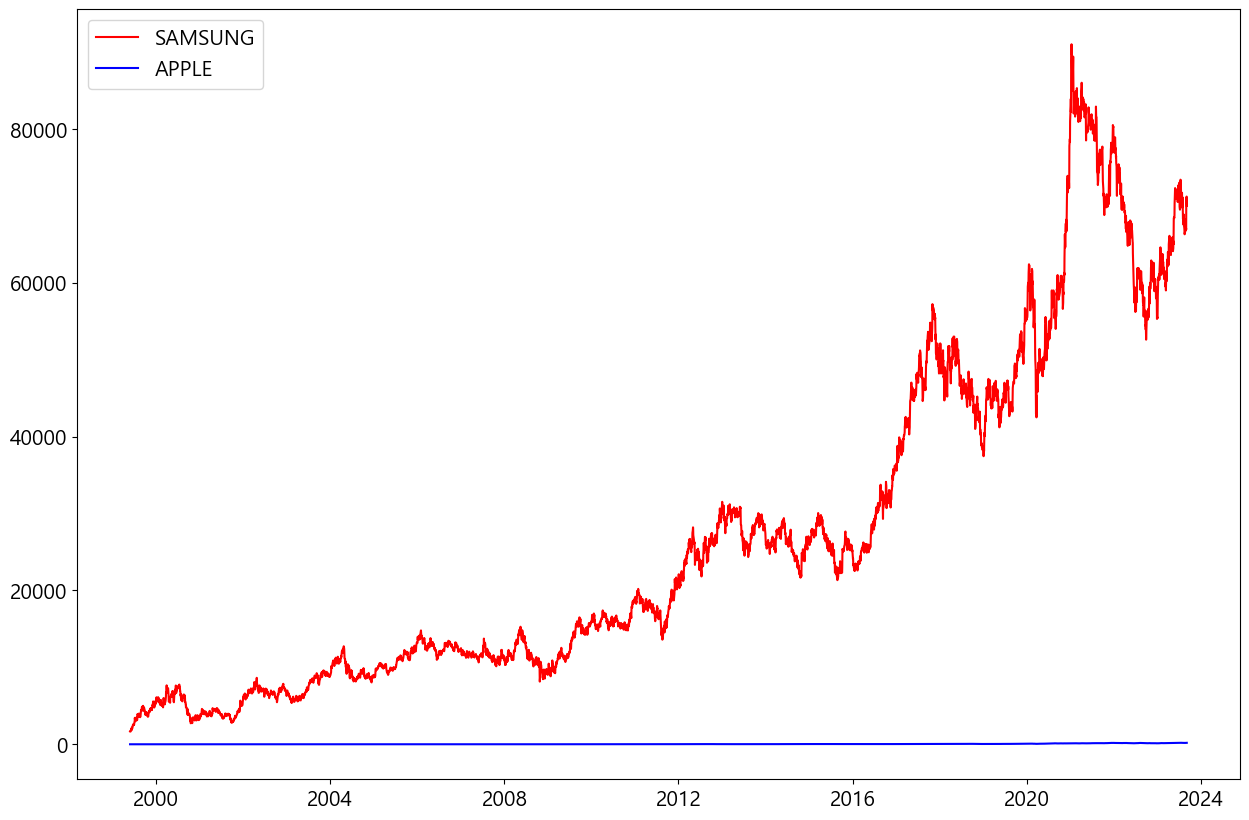

In [58]:
plt.figure(figsize=(15,10))
plt.plot(samsung["Close"], label = 'SAMSUNG', color = "red")   # Koreans use Won
plt.plot(apple["Close"], label = 'APPLE', color = "blue")   # Apples uses USD    1 USD = 1000 Won 
plt.legend(fontsize = 15)
plt.show()

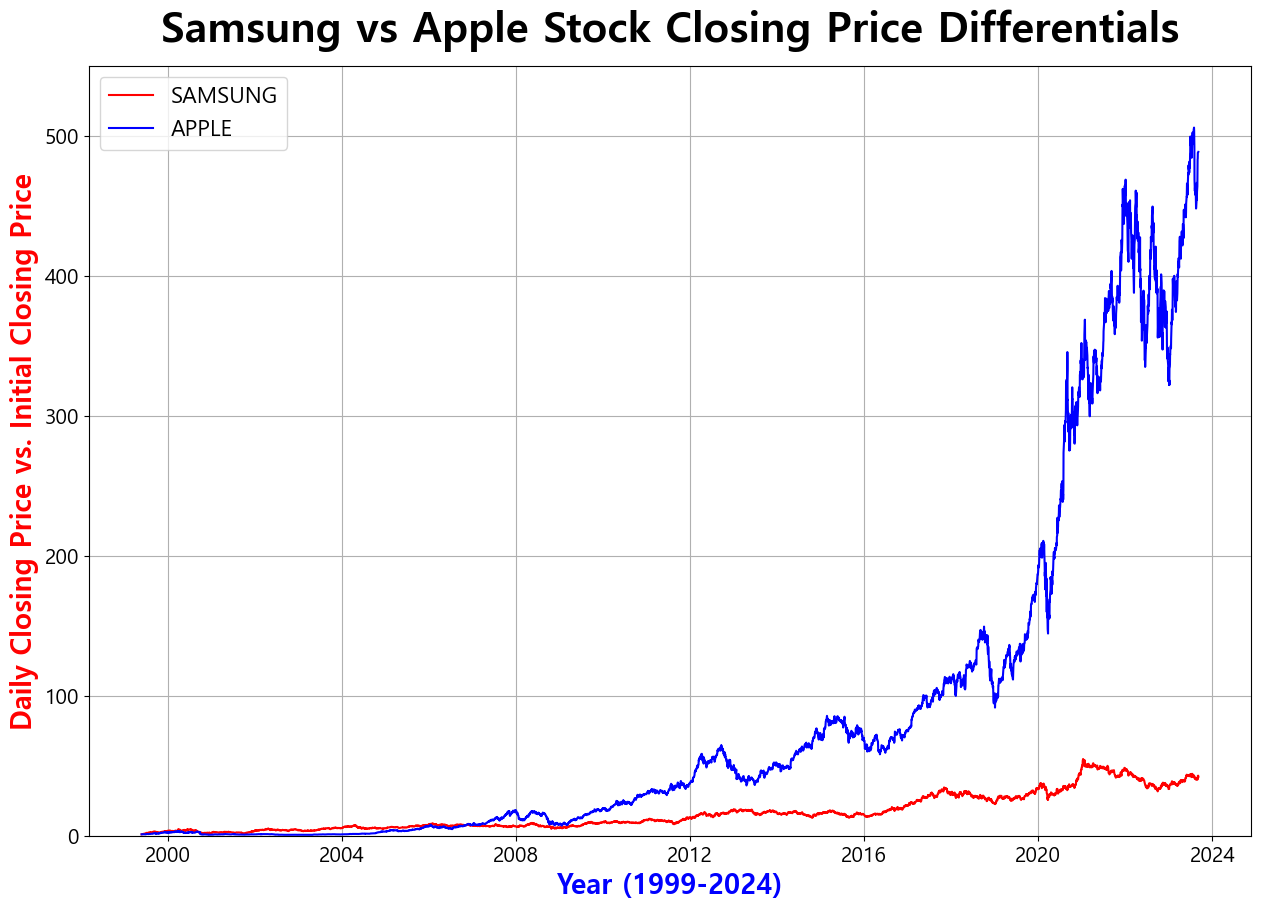

In [83]:
#conversion to make apple stocks match samsung price since Korea uses Won
sam_exp = (samsung["Close"] / samsung["Close"][samsung_first_date])
aapl_exp = (apple["Close"] / apple["Close"][samsung_first_date])
plt.figure(figsize=(15,10))
plt.title("Samsung vs Apple Stock Closing Price Differentials", fontsize = 30, x=0.5, y=1.02, weight = "bold")
plt.plot(sam_exp, label = 'SAMSUNG', color = "red")
plt.plot(aapl_exp, label = 'APPLE', color = "blue")
x1 = plt.xlabel('Year (1999-2024)', fontsize = 20, color = "blue", weight = "bold")
y1 = plt.ylabel('Daily Closing Price vs. Initial Closing Price', fontsize = 20, color = "red", weight = "bold")
plt.ylim(0,550)
plt.legend(fontsize = 16)
plt.grid()
plt.show()

### USD to Korean Won exchange Rate

In [65]:
usd_krw = fdr.DataReader('USD/KRW', '2023-03-15', '2023-08-15')   # USD/KRW -> conversion of tickers built in function
usd_krw.tail(100)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-29,1296.979980,1303.930054,1295.150024,1296.979980,1296.979980,0
2023-03-30,1307.130005,1307.589966,1295.839966,1307.130005,1307.130005,0
2023-03-31,1296.500000,1306.520020,1288.270020,1296.500000,1296.500000,0
2023-04-03,1305.479980,1320.550049,1305.479980,1305.479980,1305.479980,0
2023-04-04,1308.050049,1316.829956,1304.949951,1308.050049,1308.050049,0
...,...,...,...,...,...,...
2023-08-09,1316.670044,1321.780029,1309.540039,1316.670044,1316.670044,0
2023-08-10,1313.640015,1319.500000,1305.599976,1313.640015,1313.640015,0
2023-08-11,1318.329956,1331.260010,1316.430054,1318.329956,1318.329956,0


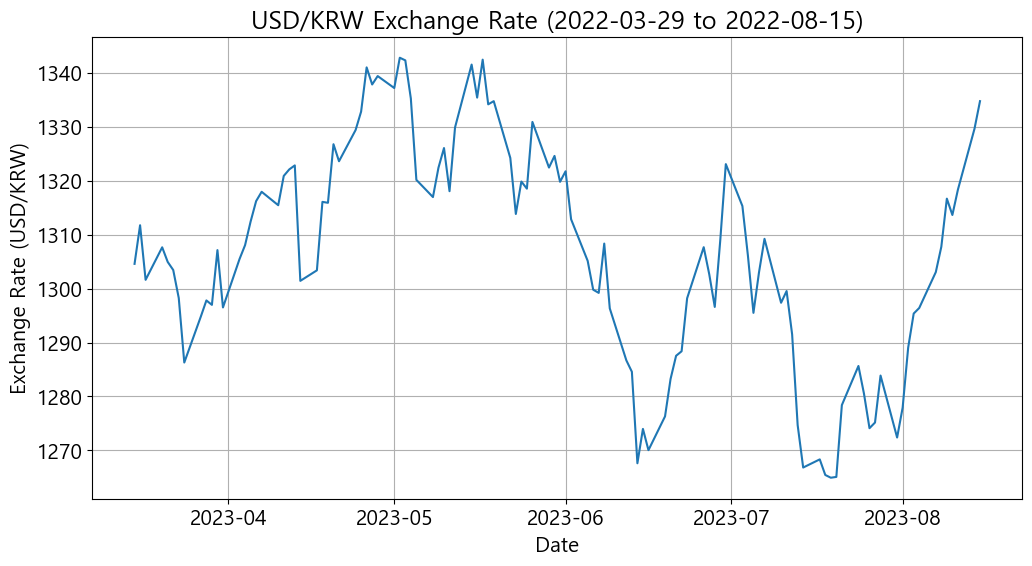

In [63]:
plt.figure(figsize=(12,6))
plt.plot(usd_krw.index, usd_krw['Close'])
plt.title("USD/KRW Exchange Rate (2022-03-29 to 2022-08-15)")
plt.xlabel('Date')
plt.ylabel('Exchange Rate (USD/KRW)')
plt.grid()
plt.show()